In [1]:
import pandas as pd
from src.ClfAutoEDA import *

In [2]:
with open('../data/features.csv') as f1:
    df = pd.read_csv(f1)

with open('../data/outcomes.csv') as f2:
    outcomes = pd.read_csv(f2, usecols=['student_id', 'outcome'])
                           
df = pd.merge(df, outcomes, on='student_id')
 

df.drop(['Unnamed: 0', 'course_id'], axis='columns', inplace=True)

## Exploratory Data Analysis

In [3]:
df.head()

,student_id,tot_page_views,average_daily_views,median_daily_views,max_daily_views,days_with_views,hours_with_views,max_views_per_hour,avg_views_per_hour,median_views_per_hour,avg_hours_with_views_per_day,max_hours_with_views_per_day,median_hours_with_views_per_day,tot_participations,average_daily_participations,median_daily_participations,max_daily_participations,days_with_participations,outcome
0,47649,1153,22.607843,16.0,118.0,51,71,88.0,16.239437,15.0,1.392157,1.392157,1.0,23,0.460000,0.0,4.0,50,True
1,52263,744,15.183673,0.0,93.0,49,67,48.0,11.104478,8.0,1.367347,1.367347,0.0,20,0.434783,0.0,3.0,46,True
2,24036,341,6.686275,0.0,80.0,51,27,48.0,12.629630,11.0,0.529412,0.529412,0.0,15,0.333333,0.0,3.0,45,True
3,52137,237,5.042553,0.0,68.0,47,19,32.0,12.473684,9.0,0.404255,0.404255,0.0,6,0.187500,0.0,3.0,32,True
4,52267,665,13.300000,0.0,161.0,50,42,118.0,15.833333,8.0,0.840000,0.840000,0.0,26,0.520000,0.0,5.0,50,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 0 to 424
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   student_id                       425 non-null    int64  
 1   tot_page_views                   425 non-null    int64  
 2   average_daily_views              422 non-null    float64
 3   median_daily_views               422 non-null    float64
 4   max_daily_views                  422 non-null    float64
 5   days_with_views                  425 non-null    int64  
 6   hours_with_views                 425 non-null    int64  
 7   max_views_per_hour               422 non-null    float64
 8   avg_views_per_hour               422 non-null    float64
 9   median_views_per_hour            422 non-null    float64
 10  avg_hours_with_views_per_day     422 non-null    float64
 11  max_hours_with_views_per_day     422 non-null    float64
 12  median_hours_with_view

In [5]:
df.dropna(axis='index', how='any', subset=['outcome'], inplace=True)

In [6]:
df.outcome = df.outcome.astype(int)


The shape of data is:  (416, 19)

The missing values in data are: 
 outcome                            0
avg_views_per_hour                 0
tot_page_views                     0
average_daily_views                0
median_daily_views                 0
max_daily_views                    0
days_with_views                    0
hours_with_views                   0
max_views_per_hour                 0
median_views_per_hour              0
days_with_participations           0
avg_hours_with_views_per_day       0
max_hours_with_views_per_day       0
median_hours_with_views_per_day    0
tot_participations                 0
average_daily_participations       0
median_daily_participations        0
max_daily_participations           0
student_id                         0
dtype: int64

The summary of data is: 
          student_id  tot_page_views  average_daily_views  median_daily_views  \
count    416.000000      416.000000           416.000000           416.00000   
mean   62126.216346      800

(     student_id  tot_page_views  average_daily_views  median_daily_views  \
 0         47649            1153            22.607843                16.0   
 1         52263             744            15.183673                 0.0   
 2         24036             341             6.686275                 0.0   
 3         52137             237             5.042553                 0.0   
 4         52267             665            13.300000                 0.0   
 ..          ...             ...                  ...                 ...   
 420       42230             978            25.736842                21.0   
 421       84679             750            20.833333                 0.0   
 422       69994             535            15.285714                 0.0   
 423       81438             375             9.146341                 0.0   
 424       81394             263            29.222222                 0.0   
 
      max_daily_views  days_with_views  hours_with_views  max_views_per_ho

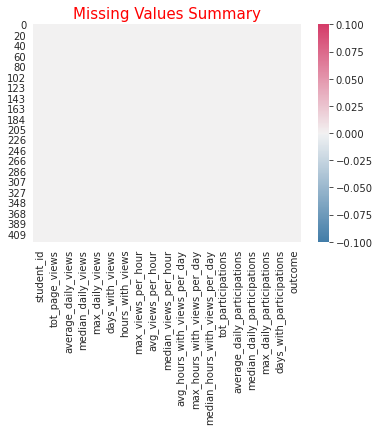

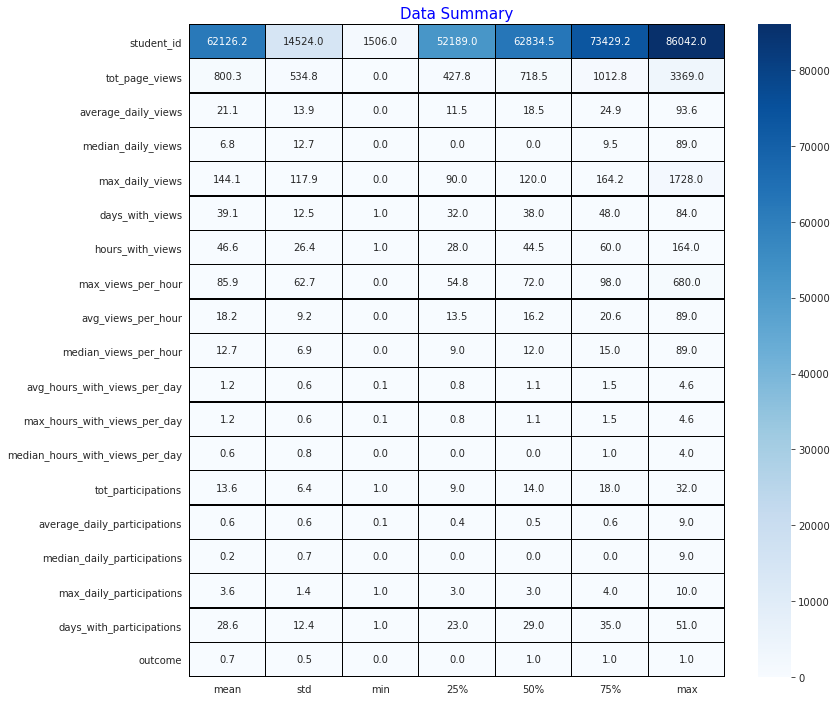

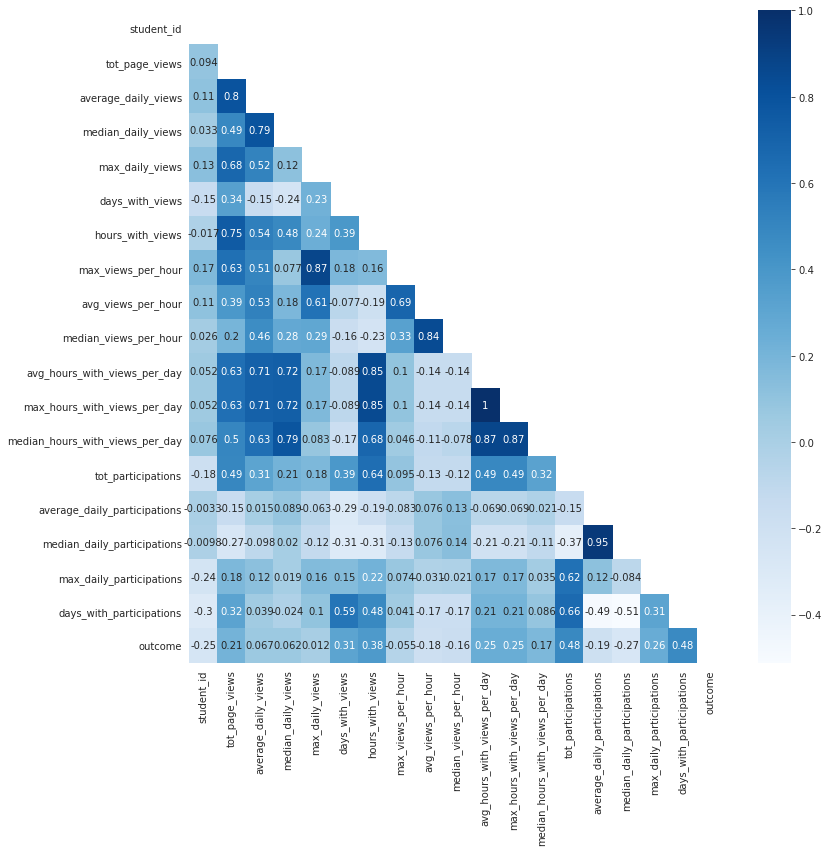

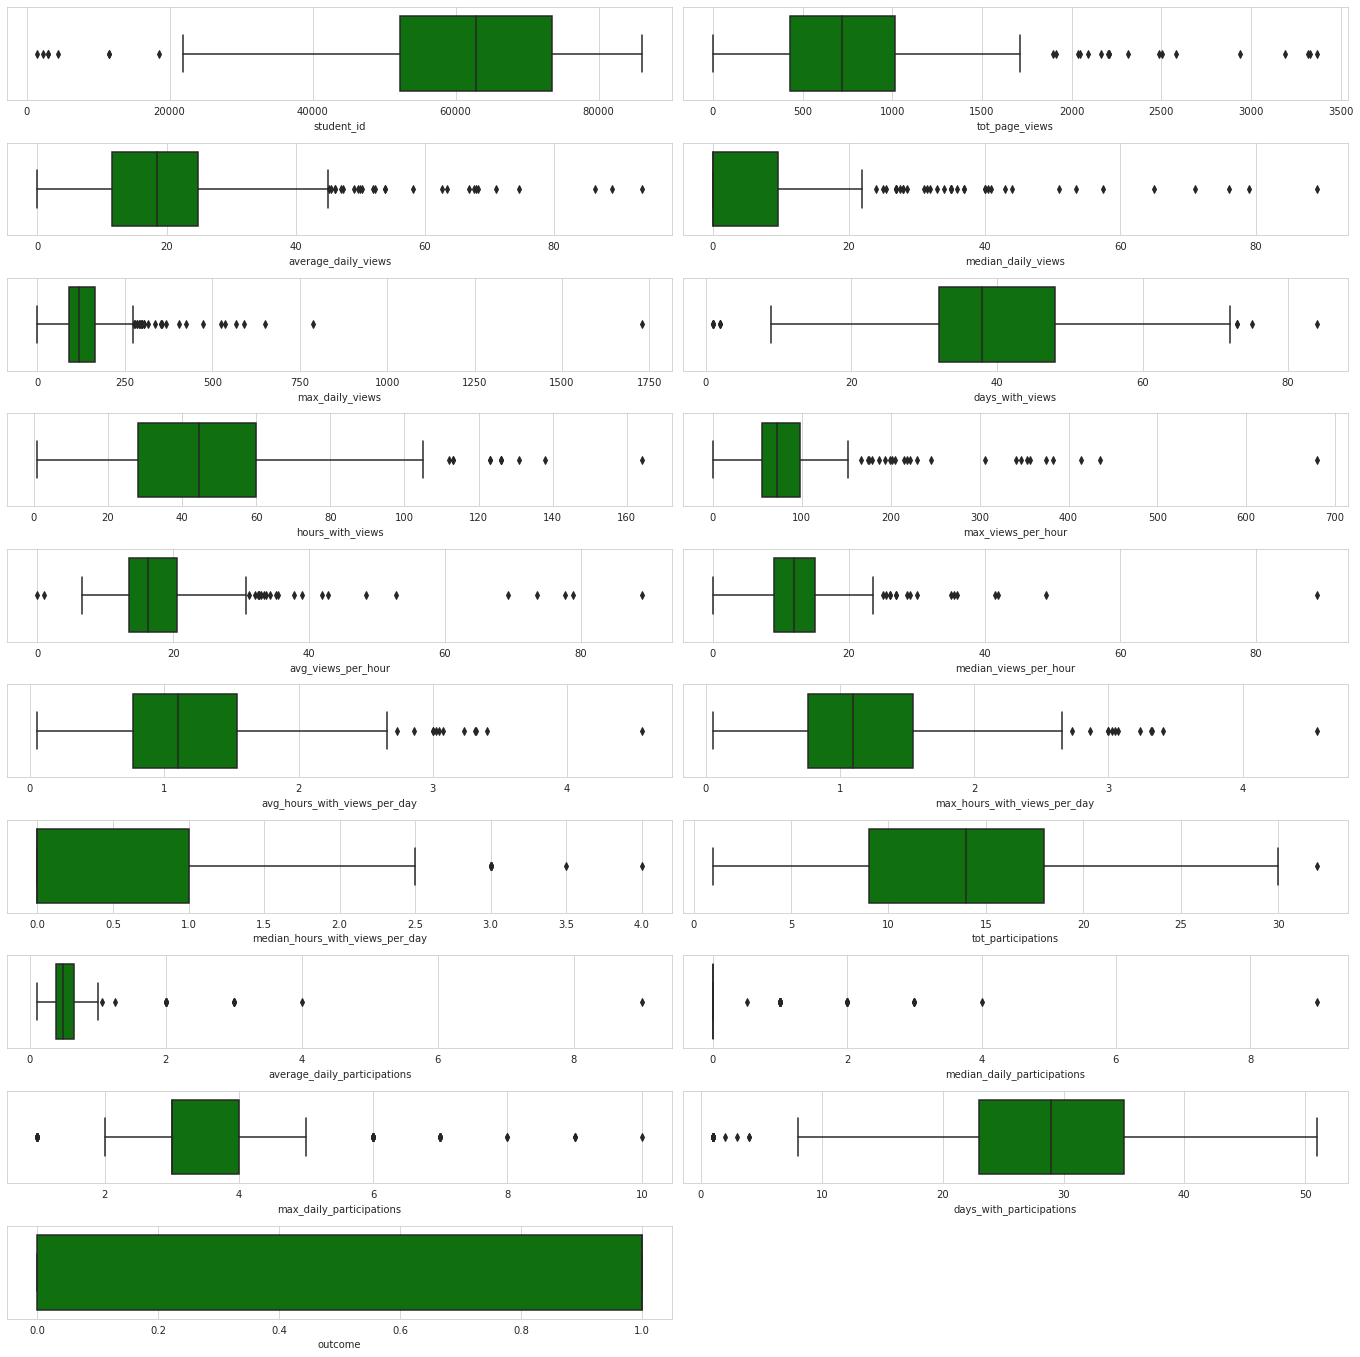

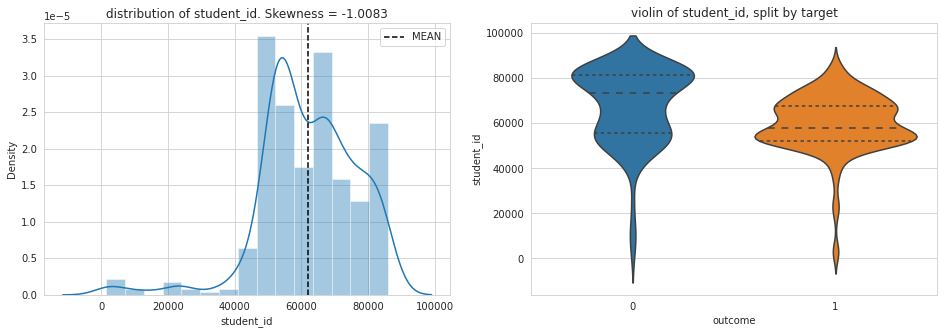

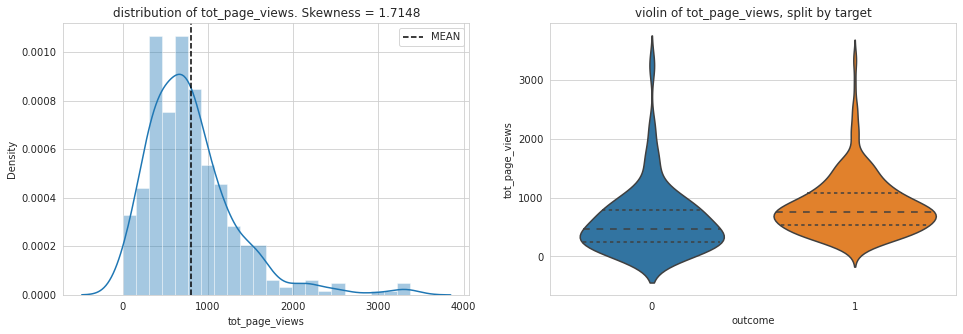

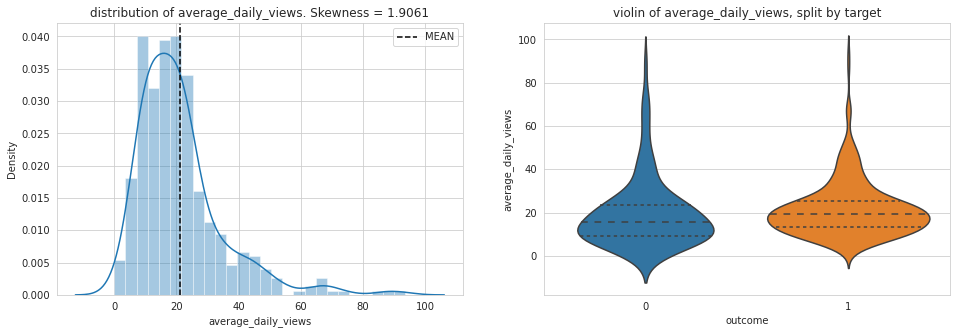

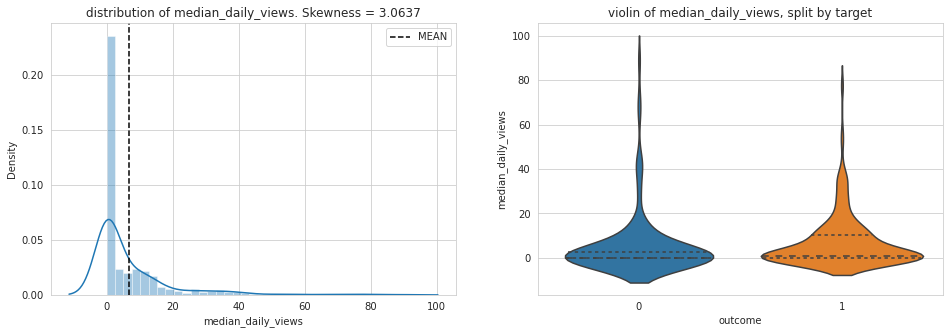

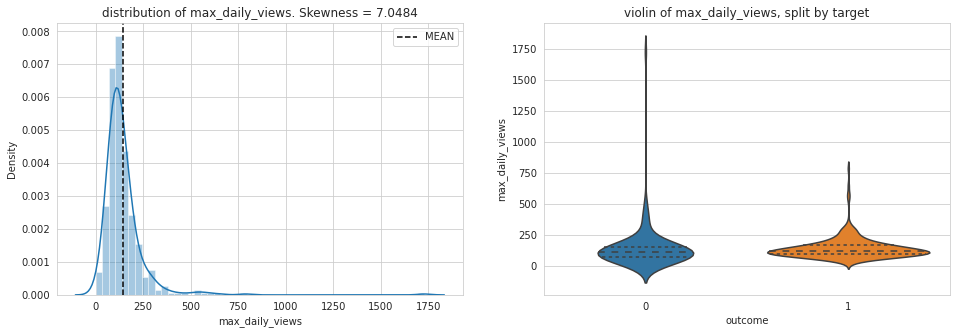

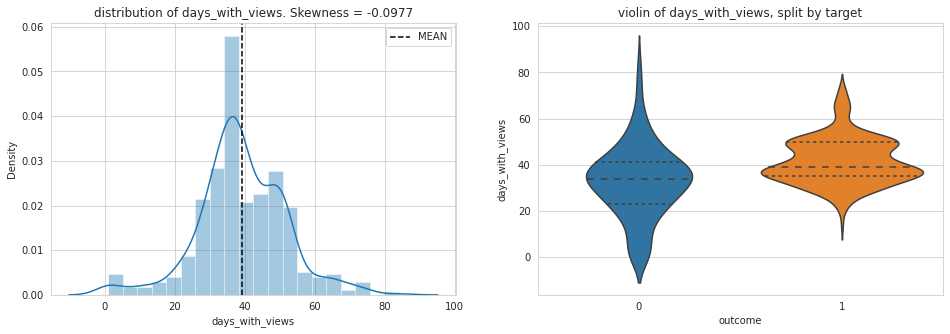

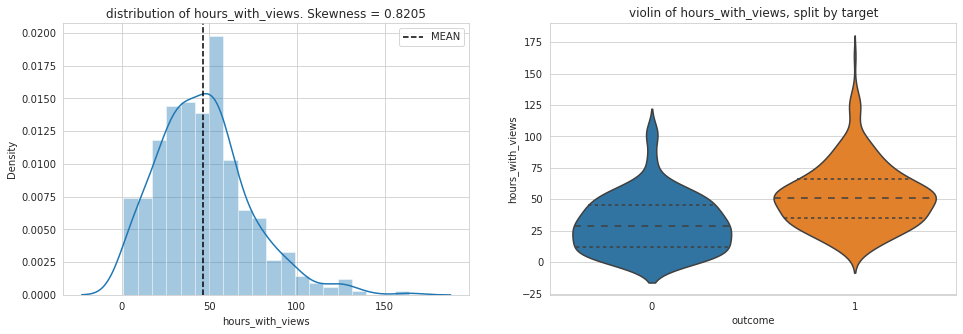

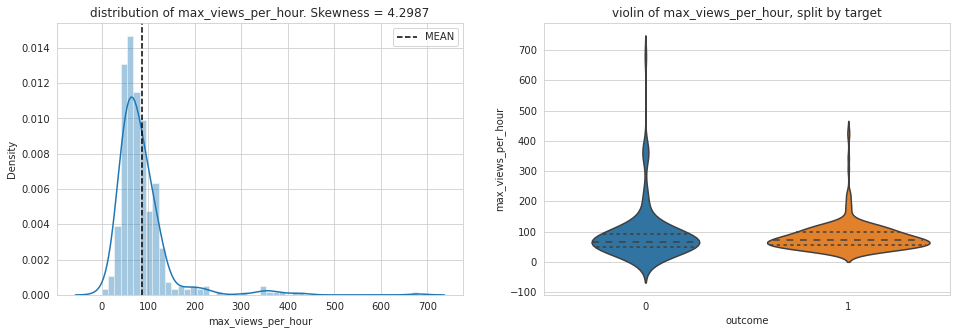

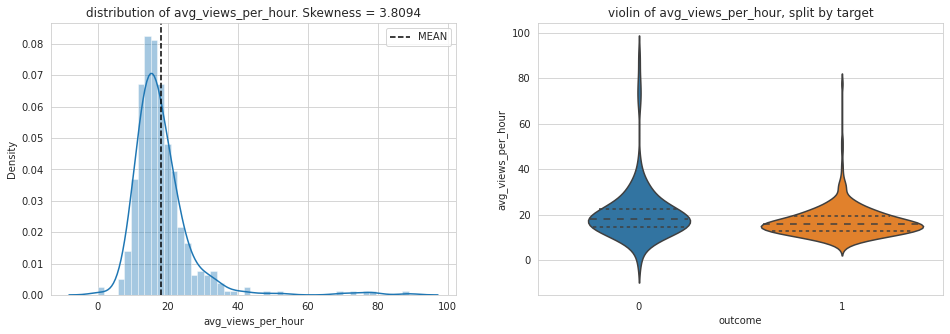

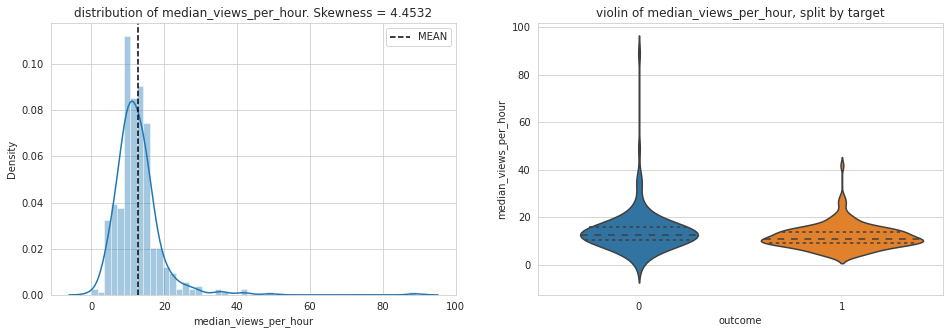

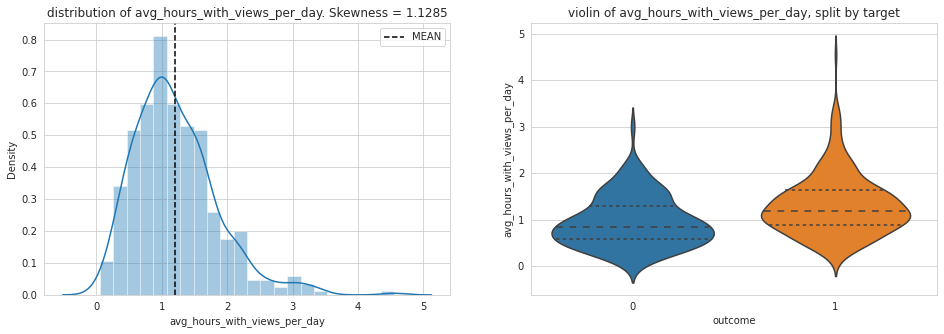

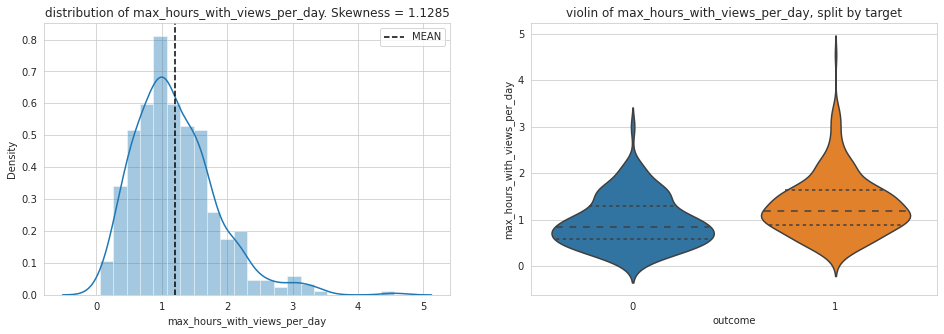

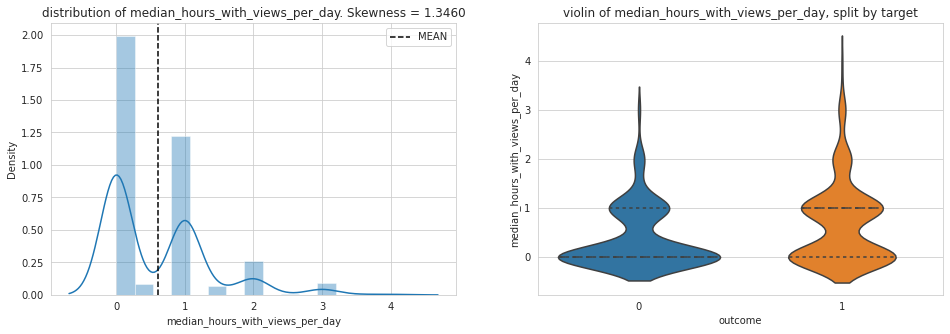

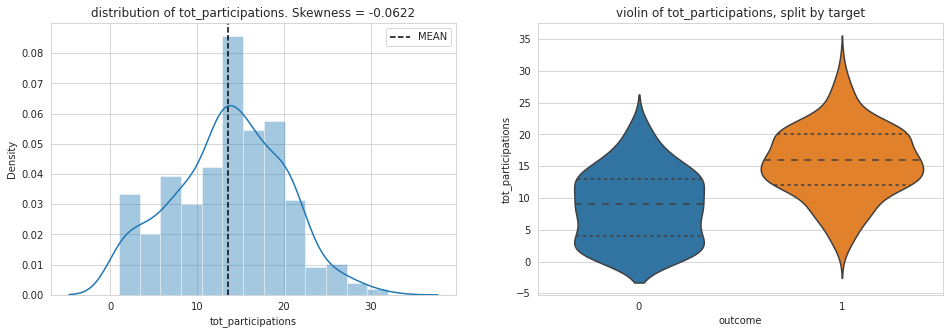

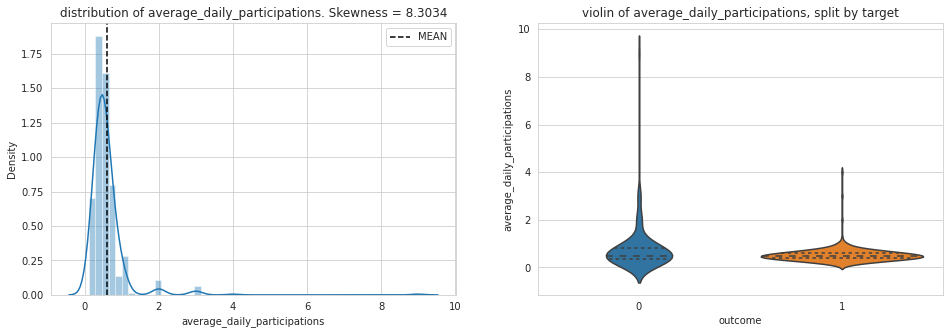

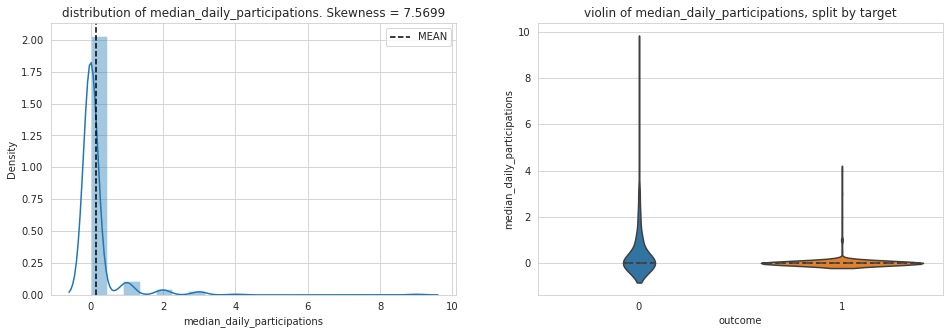

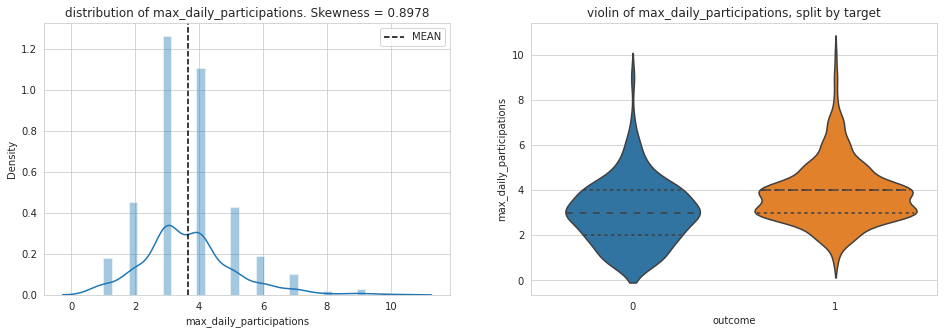

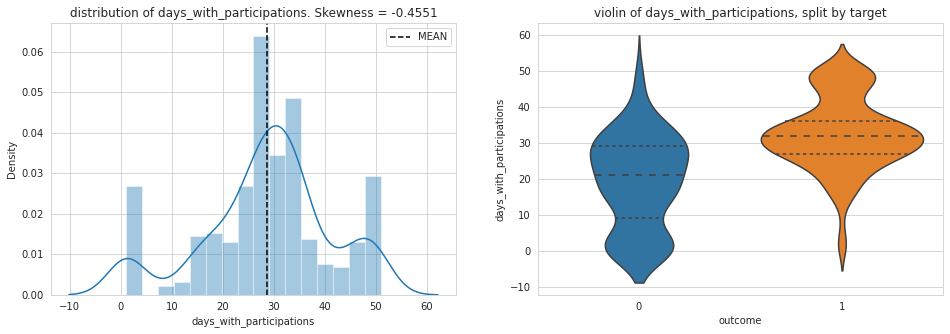

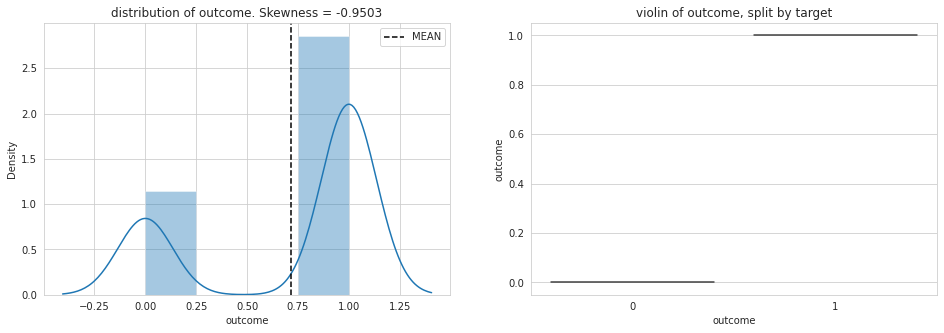

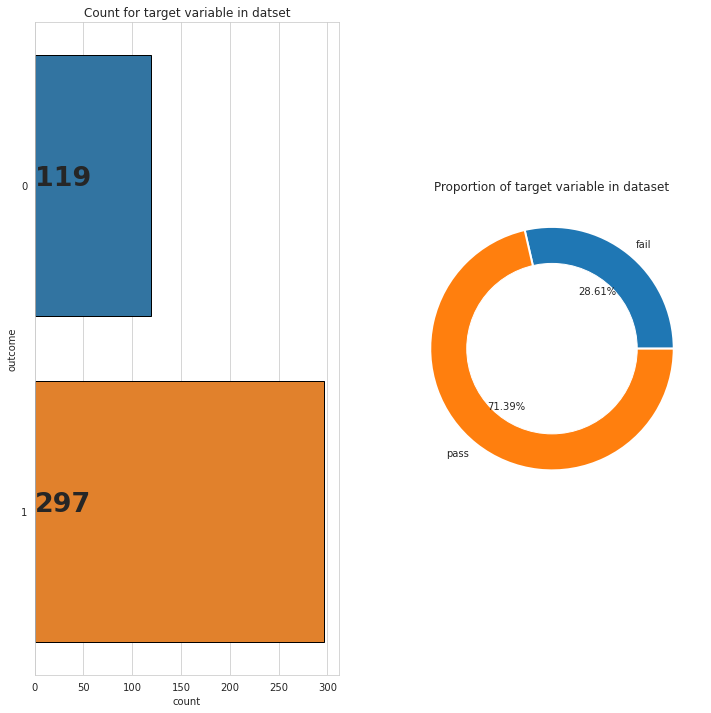

In [42]:
labels = ['fail', 'pass']
target_variable_name = 'outcome'

EDA(df,labels,target_variable_name,
        data_summary_figsize=(12,12),corr_matrix_figsize=(12,12),
        data_summary_figcol="Blues",corr_matrix_figcol='Blues',
        corr_matrix_annot=True,
        pairplt_col='all',pairplt=False,
        feature_division_figsize=(12,12))

## Missing Values

Since there are only a few missing values we can simply discard them

In [8]:
df.dropna(axis='index', how='any', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 424
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   student_id                       416 non-null    int64  
 1   tot_page_views                   416 non-null    int64  
 2   average_daily_views              416 non-null    float64
 3   median_daily_views               416 non-null    float64
 4   max_daily_views                  416 non-null    float64
 5   days_with_views                  416 non-null    int64  
 6   hours_with_views                 416 non-null    int64  
 7   max_views_per_hour               416 non-null    float64
 8   avg_views_per_hour               416 non-null    float64
 9   median_views_per_hour            416 non-null    float64
 10  avg_hours_with_views_per_day     416 non-null    float64
 11  max_hours_with_views_per_day     416 non-null    float64
 12  median_hours_with_view

## Feature Selection
- random forest feature importance
- compare with RFE

In [10]:
#import required libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [11]:
x = df.drop(['student_id','outcome'], axis='columns')
y = df['outcome'].values.reshape(-1,1)

In [12]:
x.shape, y.shape

((416, 17), (416, 1))

In [13]:
Min_Max = MinMaxScaler()
X = Min_Max.fit_transform(x)
Y= Min_Max.fit_transform(y)
# Split the data into test and training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((291, 17), (125, 17))

In [14]:
sel = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel.fit(X_train, np.ravel(Y_train))


array([False, False, False, False, False,  True, False,  True, False,
       False, False, False,  True, False, False, False,  True])

In [41]:
print("Selected features :")
_ = [print(f"- {c}") for c in x.loc[:, sel.get_support()].columns]

Selected features :
- hours_with_views
- avg_views_per_hour
- tot_participations
- days_with_participations


In [29]:
X_train_df = pd.DataFrame(X_train)
selected_features = X_train_df.columns[(sel.get_support())]
print(f'total features: {(X_train_df.shape[1])}')
print(f'selected features: {len(selected_features)}')
print(f'features with coefficients shrank to zero: {np.sum(sel.estimator_.coef_ == 0)}')

total features: 17
selected features: 4
features with coefficients shrank to zero: 13


In [21]:
removed_features = X_train_df.columns[(sel.estimator_.coef_ == 0).ravel().tolist()]
removed_features

Int64Index([0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15], dtype='int64')

In [19]:
X_train_selected = sel.transform(X_train_df)
X_test_selected = sel.transform(X_test)
X_train_selected.shape, X_test_selected.shape

((291, 4), (125, 4))

## Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# TO-DO Cross Validation
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
# Train the classifier
clf.fit(X_train_selected,np.ravel(Y_train))
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test_selected)
# View The Accuracy Of Our Selected Feature Model
accuracy_score(Y_test, y_pred)

0.76

In [44]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
# Train the classifier
clf.fit(X_train,np.ravel(Y_train))
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)
# View The Accuracy Of Our Selected Feature Model
accuracy_score(Y_test, y_pred)

0.736

## GridSearch CV: XGB and RF compared

In [ ]:
from skopt import BayesSearchCV
# parameter ranges are specified by one of below
from skopt.space import Real, Categorical, Integer



In [ ]:
# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    SVC(),
    {
        'C': Real(1e-6, 1e+6, prior='log-uniform'),
        'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'degree': Integer(1,8),
        'kernel': Categorical(['linear', 'poly', 'rbf']),
    },
    n_iter=32,
    random_state=0
)

# executes bayesian optimization
_ = opt.fit(X_train, y_train)

# model can be saved, used for predictions or scoring
print(opt.score(X_test, y_test))

In [ ]:
import xgboost as xgb 

In [ ]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(x_train,label=y_train)
dtest=xgb.DMatrix(x_test)

In [ ]:
# fine tune XGB and RF

In [45]:
#look at confusion matrix
# minimize erros on failure
# 70% errors basically data imblance... so maybe balance data?